## VISUALIZE
- A Jupyter notebook to help display the inputs of the model as well as it's weights

In [3]:
from game import Game
from agent import PongAgent
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math

# Define your model architecture
def build_model():
    p = PongAgent(False, 1, True)
    return p.model

## Display model inputs:

- The model takes in a 280 x 120 grid of pixels.
- The color values encode things like velocity and object type.
- We can display the model's inputs over time as a video

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1334:(snd_func_refer) error evaluating name
ALSA lib conf.c:5178:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5701:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM default


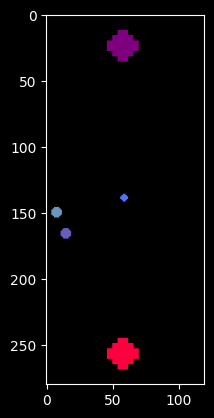

In [4]:
s = Game(**{'obstacles':2, 'jupyter':1, 'nn':0, 'vision':True})

image_list = []
for _ in range(500):
    ns = s.step({'p1':0,'p2':0})
    image_list.append(s.get_vec_grid())

s.end()

fig, ax = plt.subplots()

# Initialize the display of the first image
img_display = ax.imshow(image_list[0][0])

# Function to update the image for each frame
def update_frame(i):
    img_display.set_data(image_list[i][0])
    return [img_display]

# Create the animation object
ani = animation.FuncAnimation(fig, update_frame, frames=len(image_list), interval=1)

# Display the animation in the notebook
HTML(ani.to_jshtml())

## Visualize model weights
- For convolutional layers we can display the weights as color images for each of the dimensions
- For dense layers we can plot the weights mapping to the next layer's neurons as an image

/home/quimbo/miniconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1723922454.274133 2918340 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723922454.274300 2918340 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723922454.274335 2918340 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723922454.393206 2918340 cuda_execu

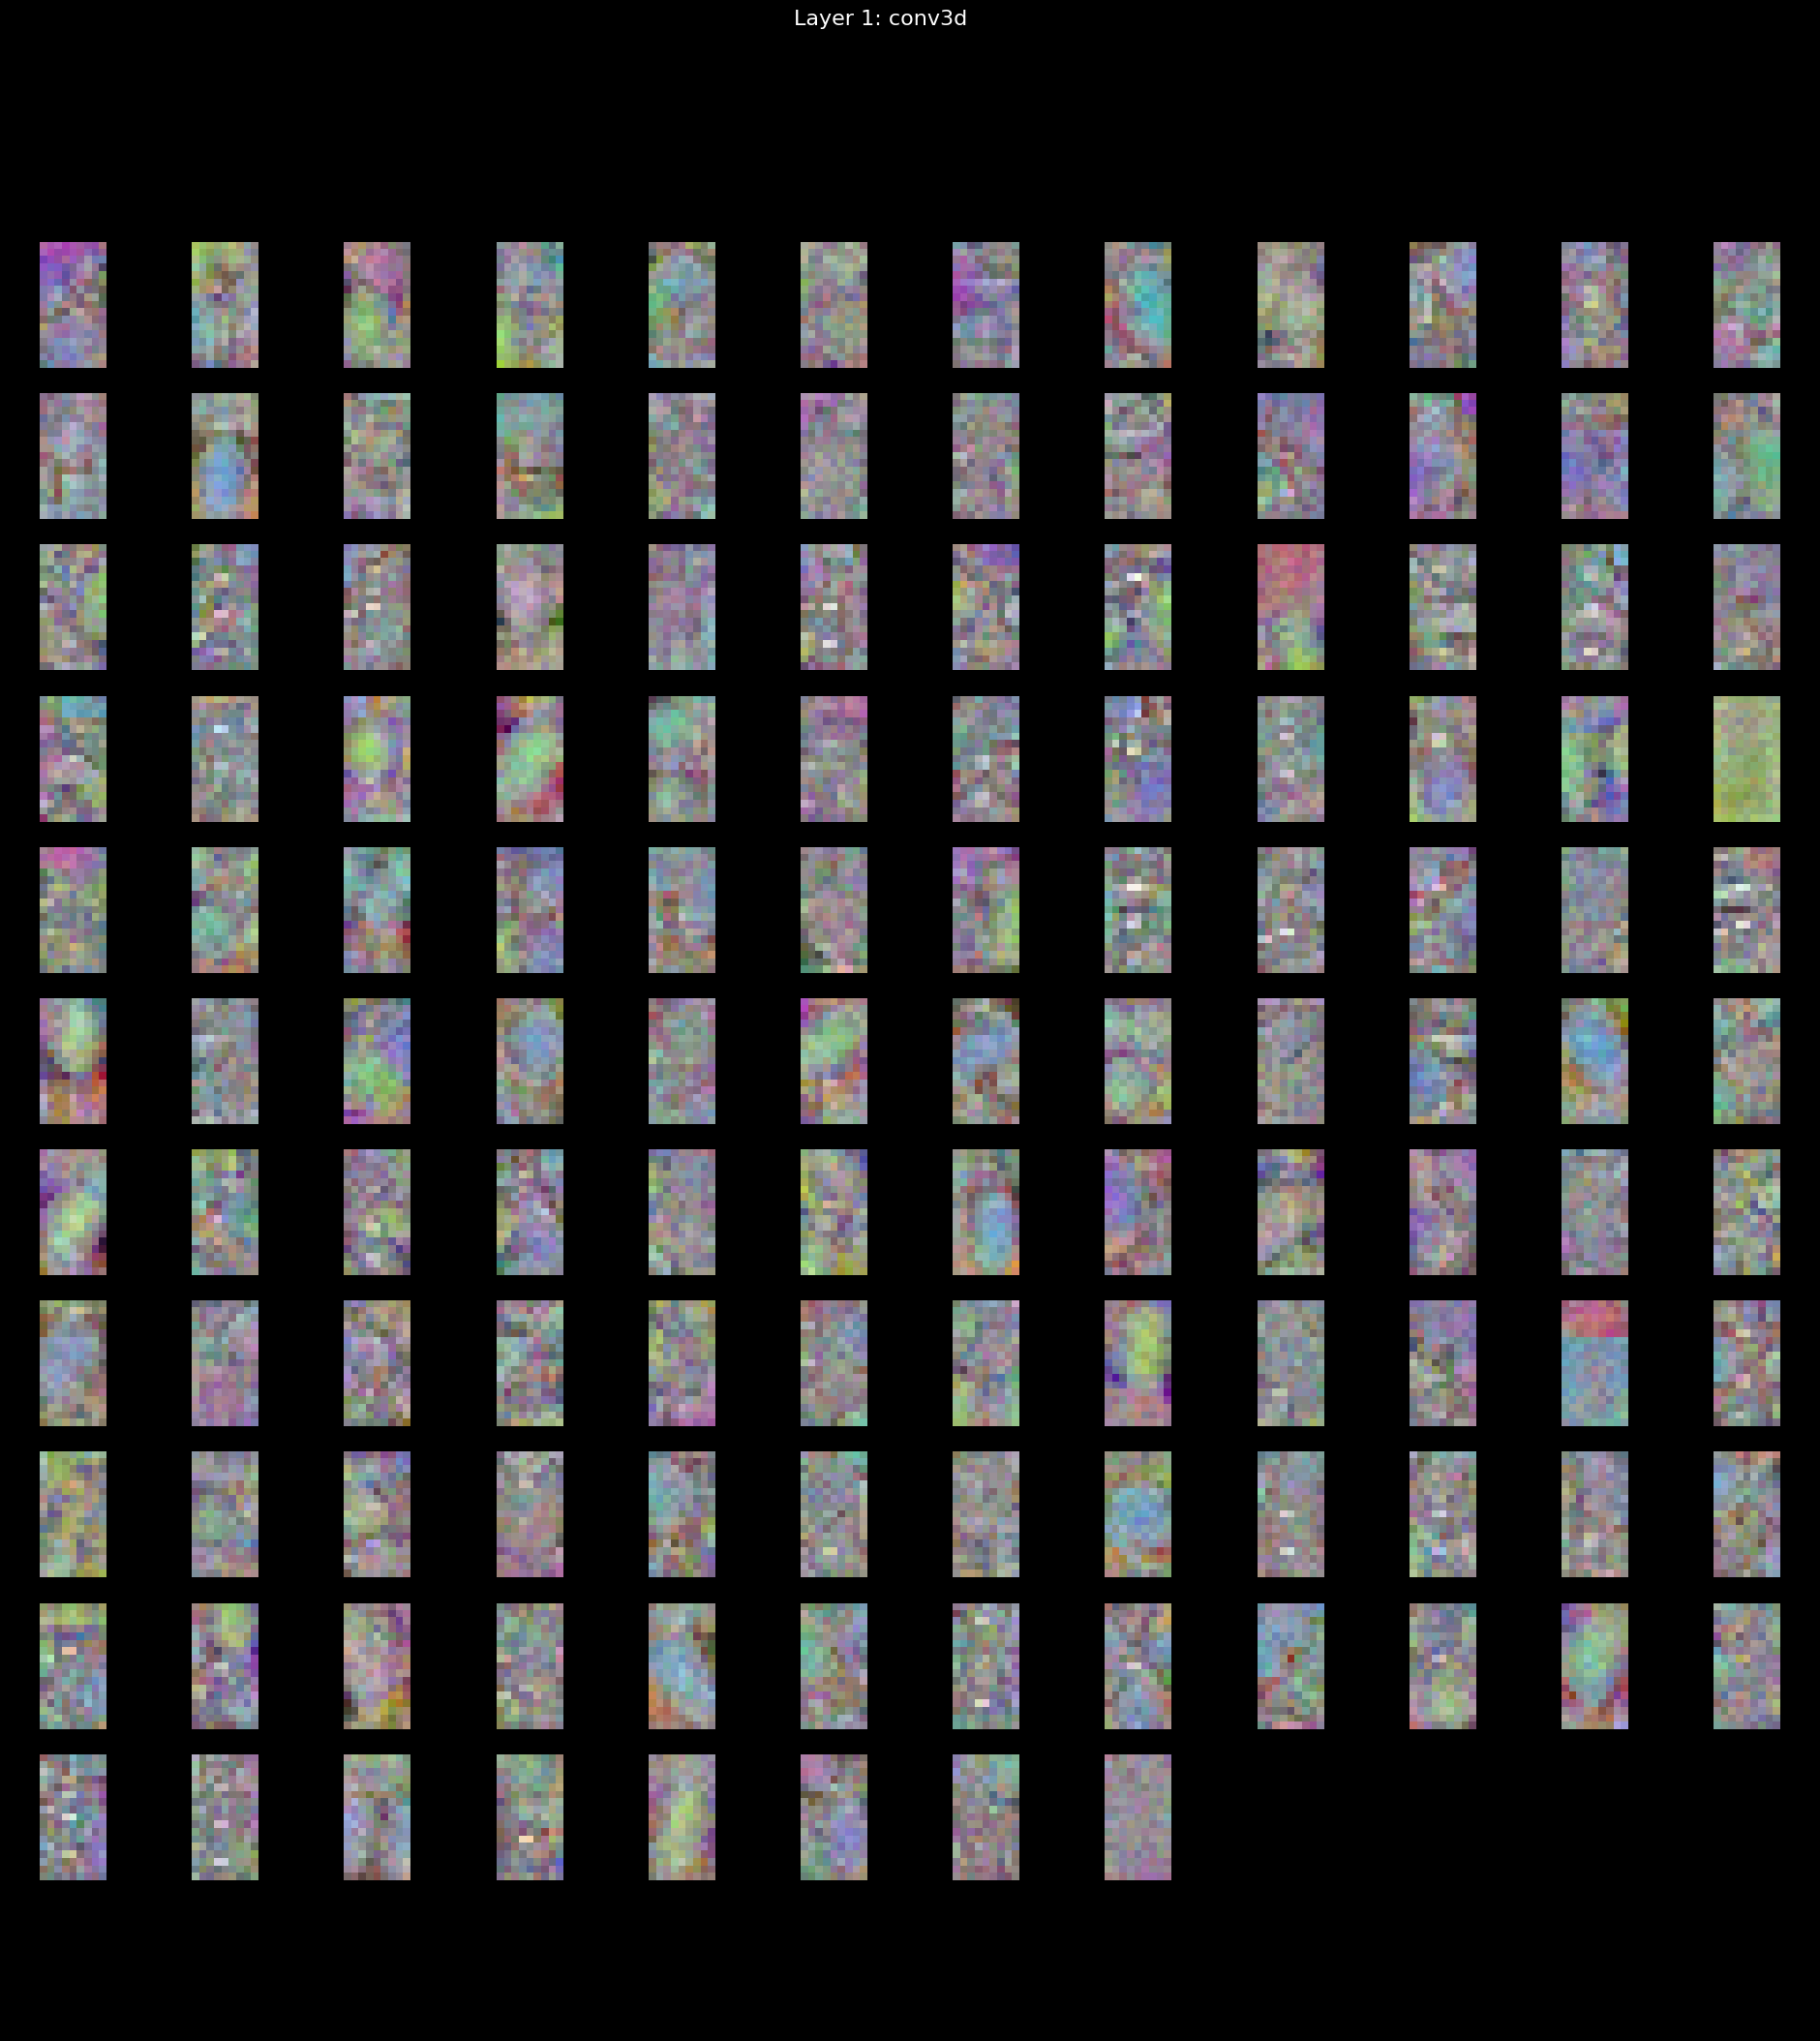

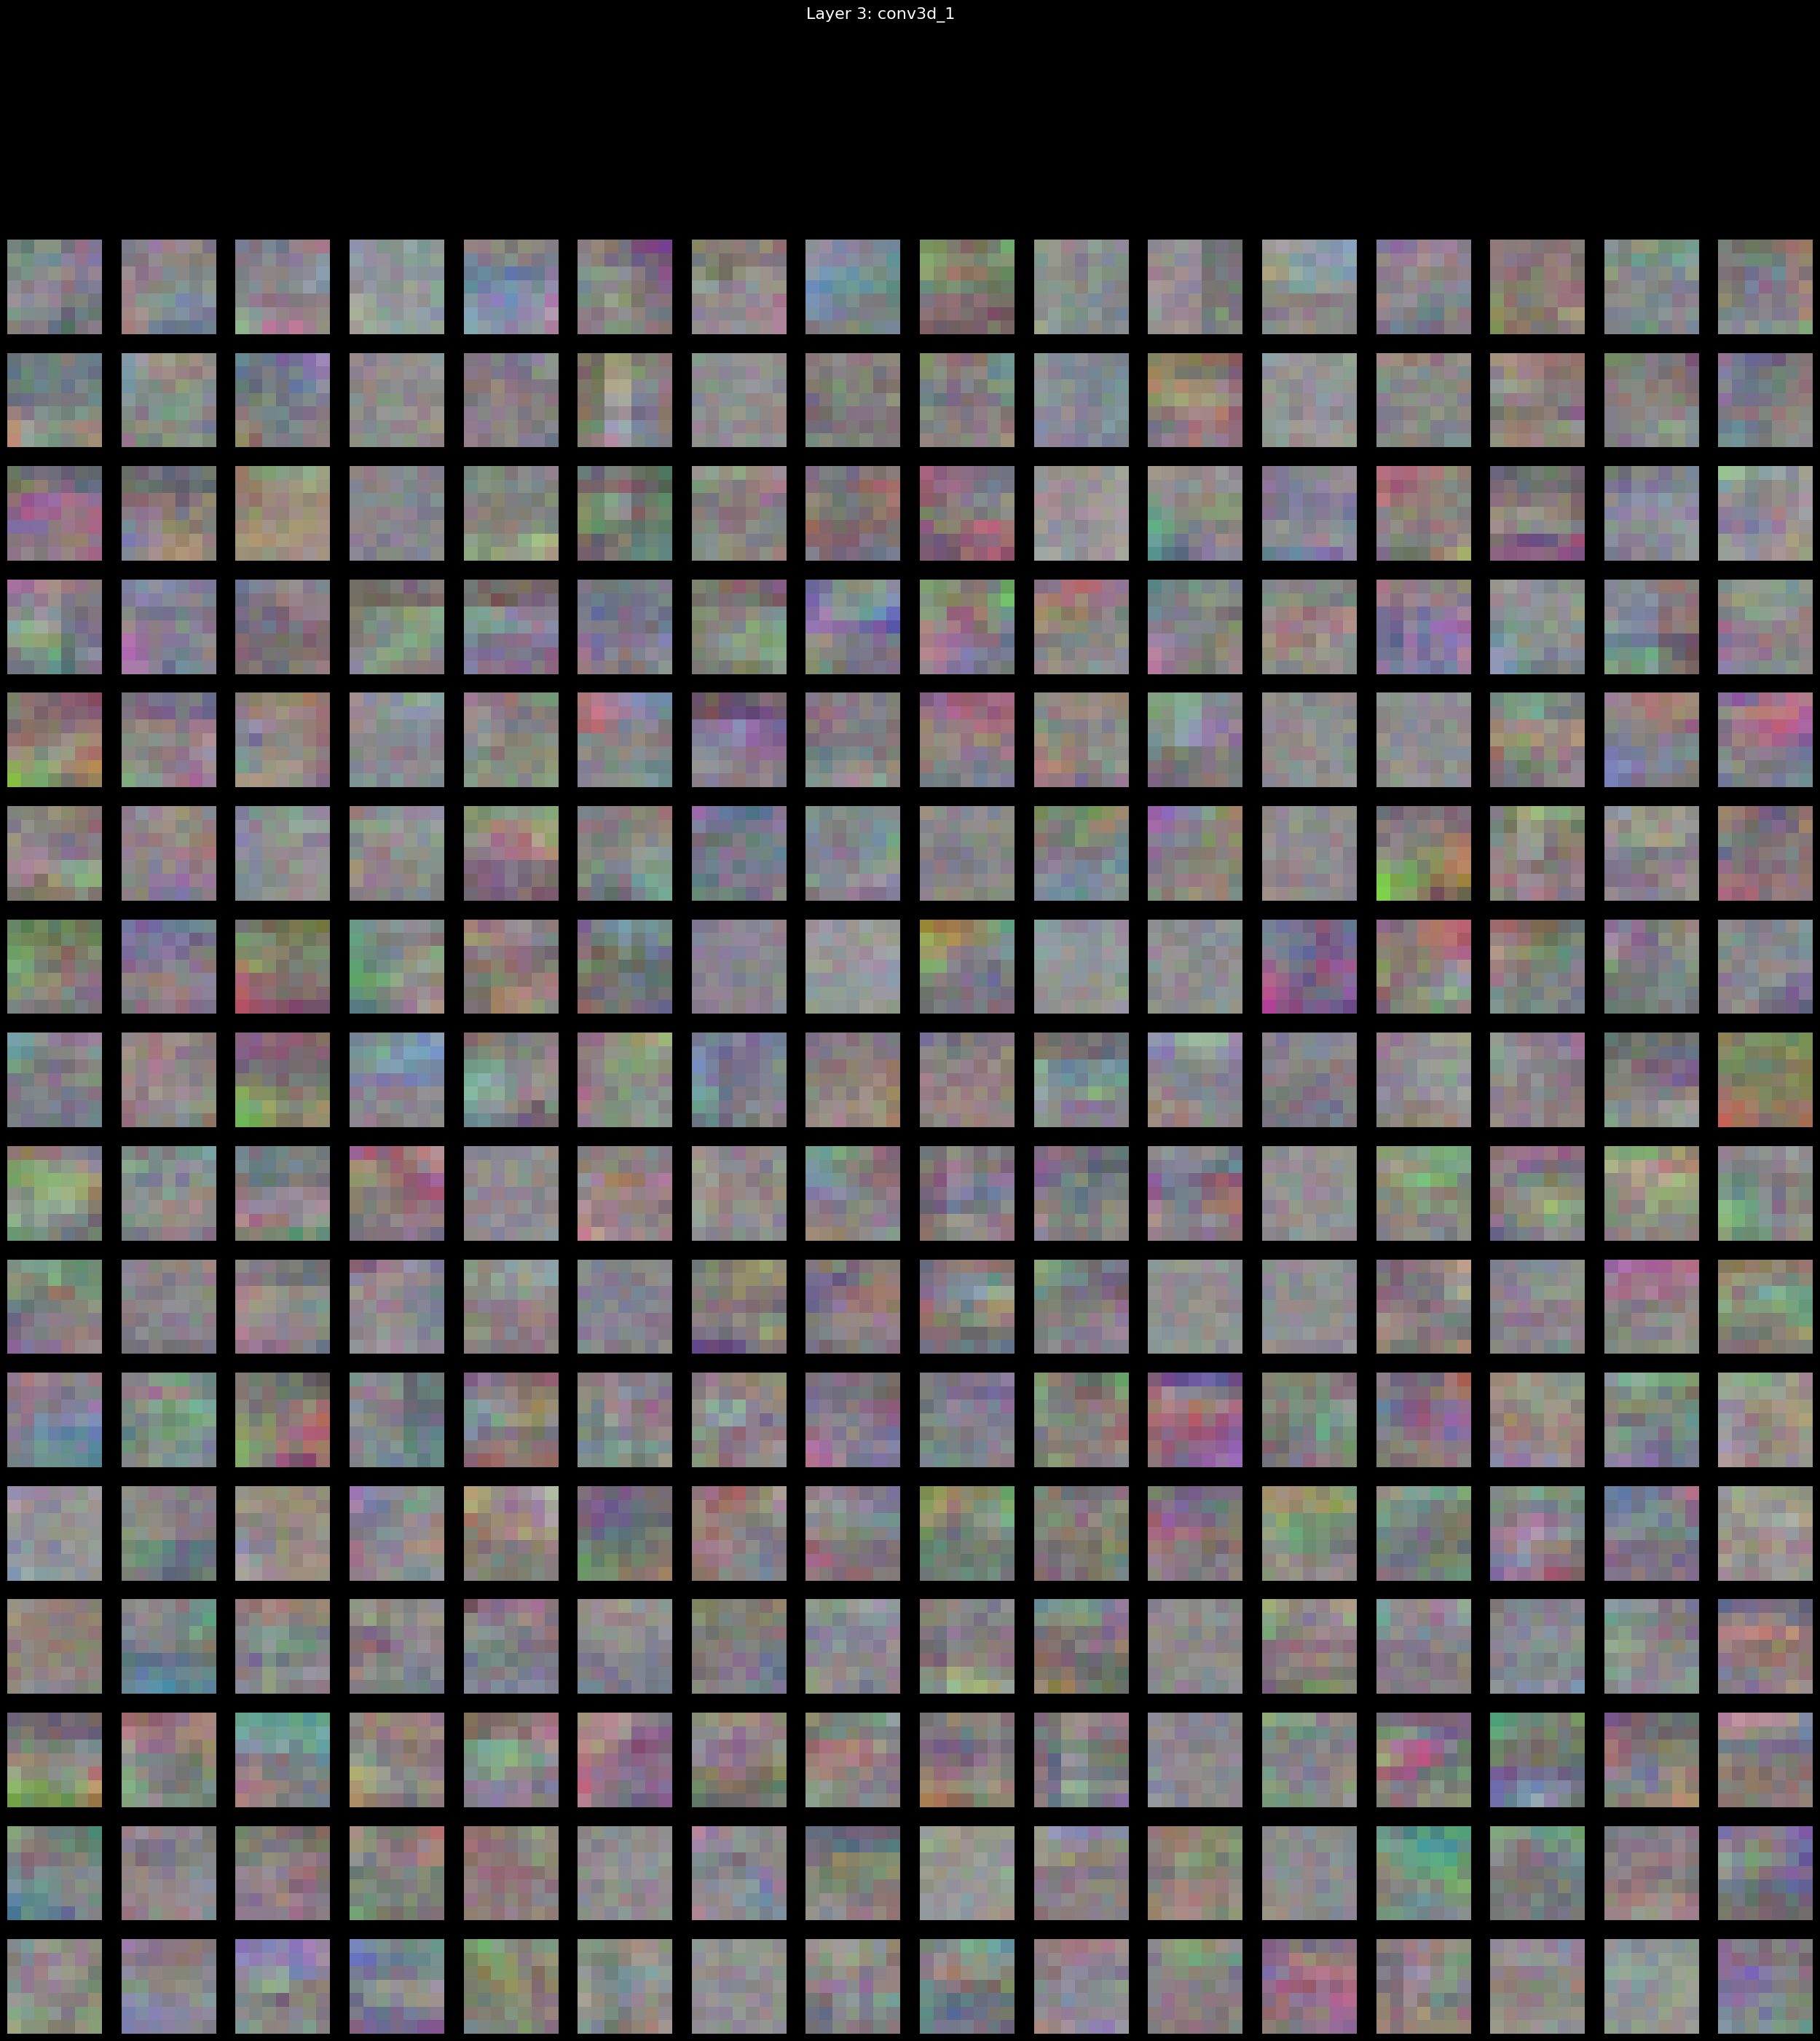

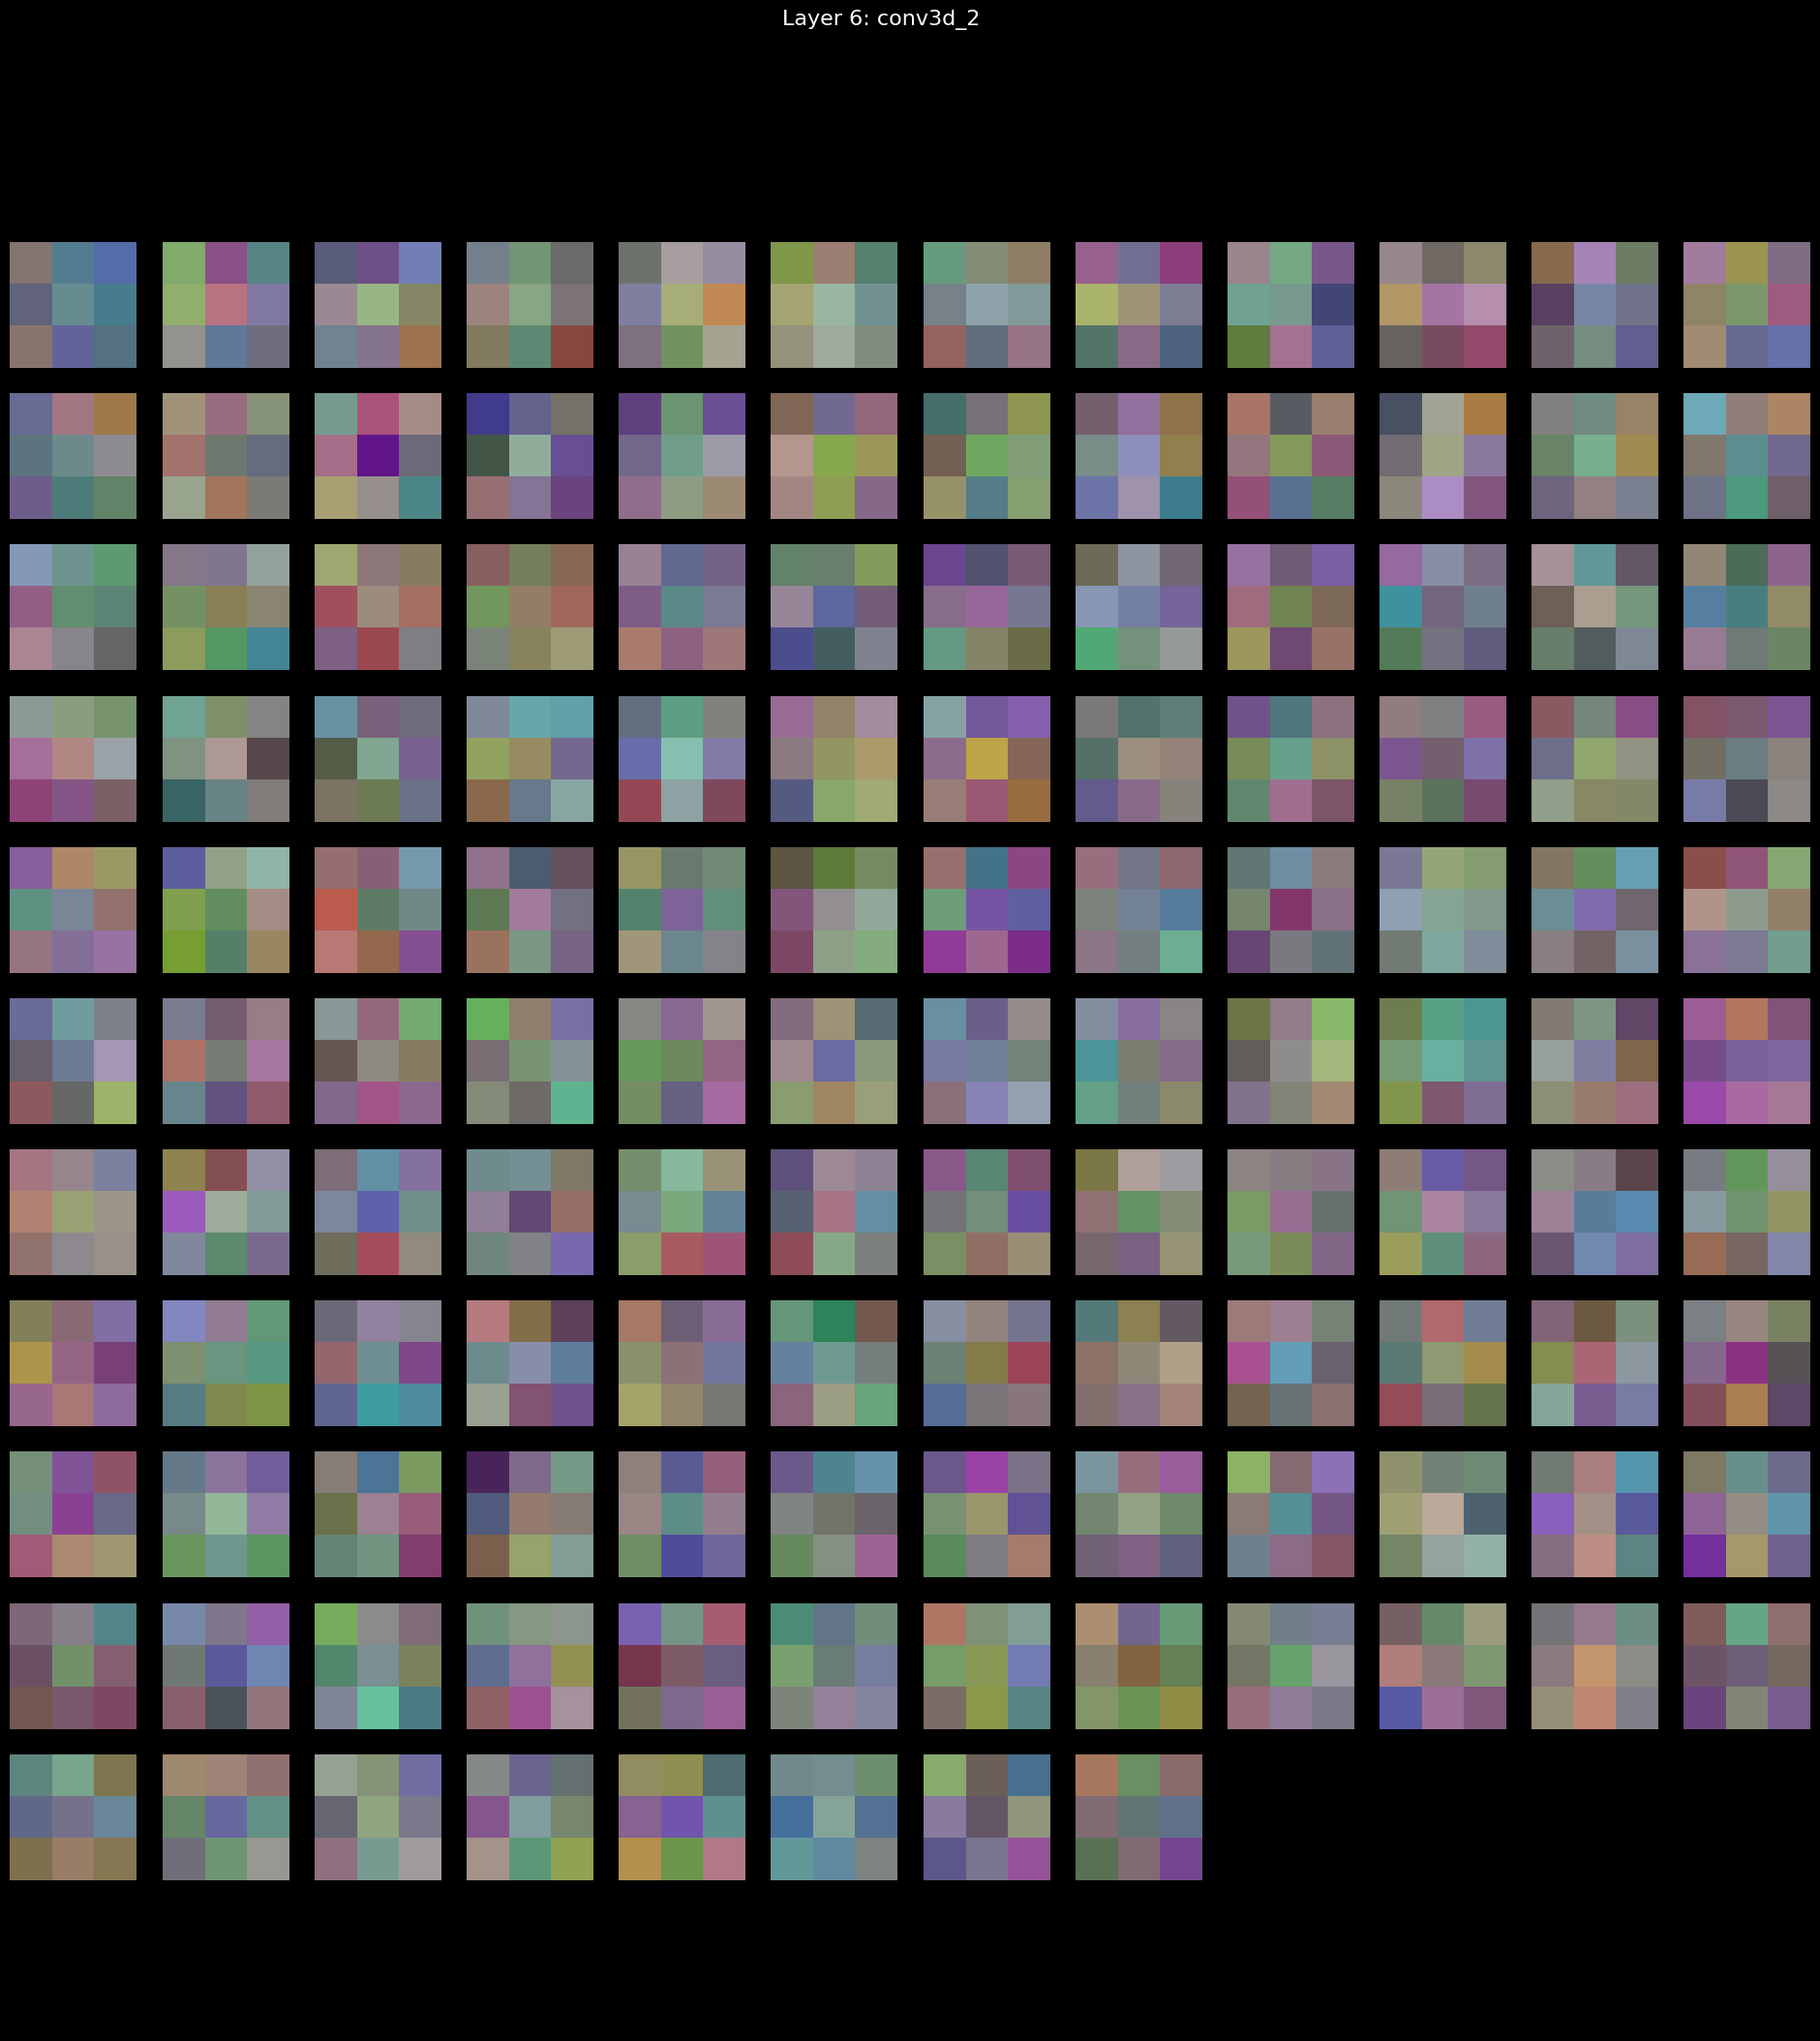

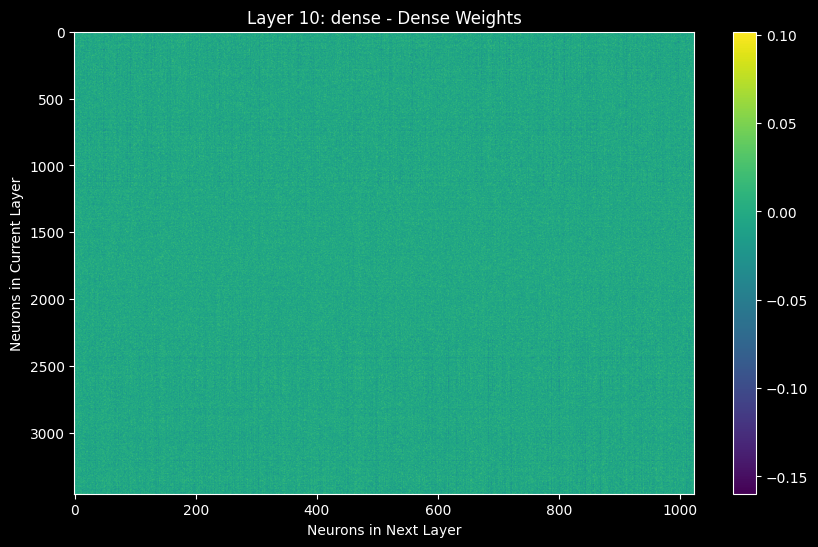

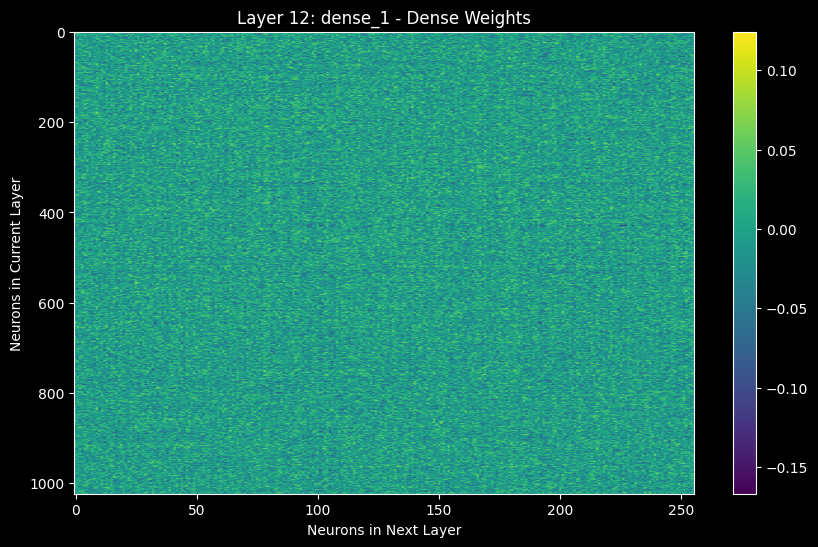

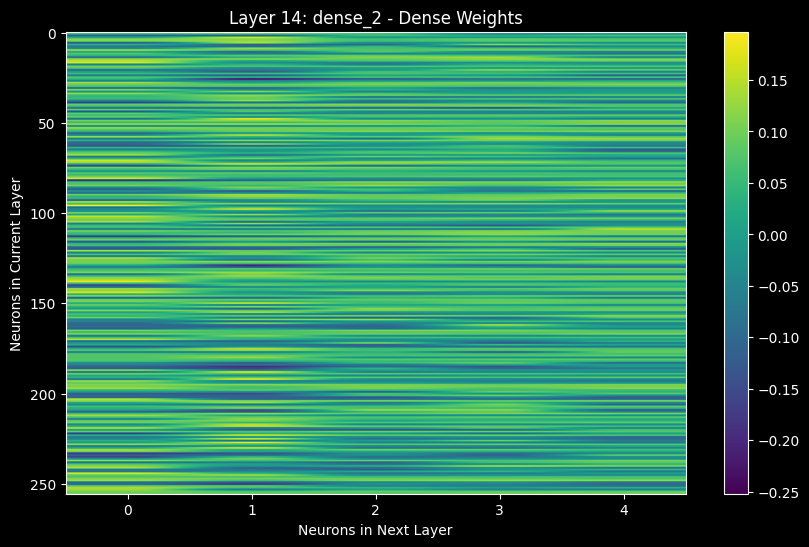

In [5]:
model = build_model()
model.load_weights('pong_agent.h5')

for layer_idx, layer in enumerate(model.layers):        
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        filters = (filters - filters.min()) / (filters.max() - filters.min())
        num_filters = filters.shape[-1]
        grid_size = math.ceil(math.sqrt(num_filters))

        fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
        fig.suptitle(f'Layer {layer_idx + 1}: {layer.name}', fontsize=16)
        
        for i in range(grid_size * grid_size):
            row, col = divmod(i, grid_size)
            ax = axes[row, col] if grid_size > 1 else axes
            
            if i < num_filters:
                kernel = filters[..., i]

                if kernel.shape[-1] == 3:
                    for j in range(3):
                        ax.imshow(kernel[..., j], cmap='viridis')
                        ax.axis('off')
                else:
                    ax.imshow(kernel[..., 0], cmap='viridis')
                    ax.axis('off')
            else:
                ax.axis('off')
        plt.show()

    if 'dense' in layer.name:
        weights, biases = layer.get_weights()

        plt.figure(figsize=(10, 6))
        plt.imshow(weights, aspect='auto', cmap='viridis')
        plt.colorbar()
        plt.title(f'Layer {layer_idx + 1}: {layer.name} - Dense Weights')
        plt.xlabel('Neurons in Next Layer')
        plt.ylabel('Neurons in Current Layer')
        plt.show()